In [7]:
from data.data_reading import data_reading
from data.data_processing import data_processing
from ruspy.estimation.estimation_transitions import estimate_transitions
from figures_introduction import *

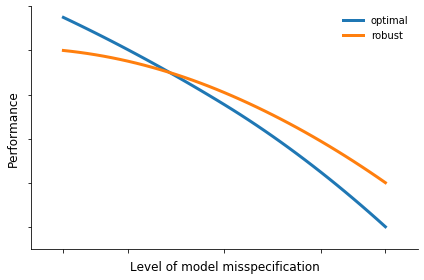

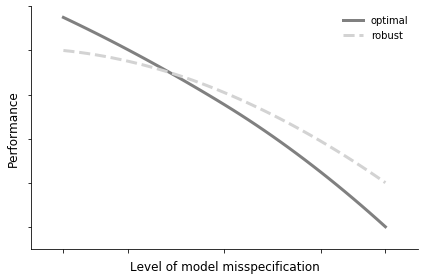

In [8]:
get_intorduction_decision_making()

In [9]:
beta = 0.9999
init_dict = {
    "groups": "group_4",
    "binsize": 1000,
}

In [10]:
data_reading()
repl_data = data_processing(init_dict)
trans_results = estimate_transitions(repl_data)
print(trans_results)

{'trans_count': array([ 106,  358, 1201, 1058,  779,  562,  200,   16,    2,    3,    4,
          2,    1]), 'x': array([2.46971129e-02, 8.34110144e-02, 2.79822900e-01, 2.46505115e-01,
       1.81500475e-01, 1.30941293e-01, 4.65983299e-02, 3.72787042e-03,
       4.65985166e-04, 6.98968828e-04, 9.31963223e-04, 4.65985059e-04,
       2.32987345e-04]), 'std': array([[0.00372112, 0.00740564, 0.01404299, 0.01461579, 0.01242096,
        0.01067998, 0.00487221, 0.00147927, 0.00032814, 0.00041643,
        0.00052384, 0.00028321, 0.00014773],
       [0.00469096, 0.00794036, 0.01332074, 0.01463419, 0.01317431,
        0.01221499, 0.00530829, 0.00260566, 0.00101904, 0.00091381,
        0.0014508 , 0.00076697, 0.00042724]]), 'fun': 7556.142113662267}


In [27]:
bin_size_plot = 10000
df_num_obs(repl_data, bin_size_plot, init_dict)

,Num_Obs
10000,276.0
20000,238.0
30000,242.0
40000,200.0
50000,197.0
60000,194.0
70000,195.0
80000,176.0
90000,183.0
100000,162.0


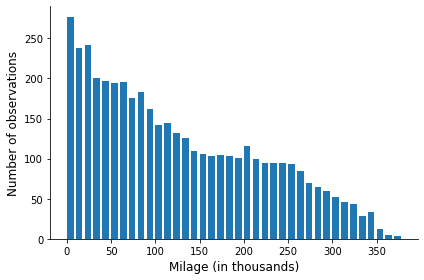

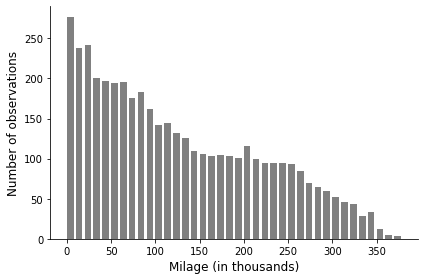

In [29]:
get_number_observations(repl_data, bin_size_plot, init_dict)